# ZFOURGE SED Template Processing 
Using the generated ZFOURGE SED templates from the cdfs field, we explore how these SEDs will react in the UVJ colour space to see if the UVJ coordinates are still in the sample place.


In [503]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [504]:
# We are attempting to read in a new set of SEDs that have been generated using a variation of Michael's ZFOURGE SED processing code.
# the SEDs are in the form of csvs, this can be explored in the zfourge/seds
# directory. The csvs are in the form of:
# Wavelength (microns), Flux Density (10^-19erg_s_cm^2_Angstrom)

zfourge_folderpath = os.path.join('Eazy Template Extractions', 'zfourgeSEDs')
# We would like to create a function to read this in
def read_zfourge_template(folder_path, name):
    """_summary_

    Args:
        folder_path (string): path to the folder where the SED templates are located
        name (string): name of the object
    
    Returns:
        df: Returns a dataframe containing the SED template
        objname: Returns the name of the object
    """
    folder_path = os.path.join(folder_path)
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        # Find filepath and convert to df
        
        # get rid of units in the filename
        objname = file.split('_units')[0]
        objname = objname.split('_')[1]
        if objname == name:
            filepath = os.path.join(folder_path, file)
            df = pd.read_csv(filepath)
            
            print(df)
            # our wavelength is in microns, convert to Angstroms
            
            # for the first column, we want to convert to Angstroms
            df.iloc[:, 0] = df.iloc[:, 0] 
            # Name each of the columns appropriately
            df.columns = ['lambda (Angstroms)', 'Total Flux (erg/s/cm^2/Angstrom)']
            print(objname)
            return df, objname
        
    
    return None, None

df, objname = read_zfourge_template(zfourge_folderpath, '7544')

        Wavelength   FluxDensity
0     9.189883e+01  1.710123e-03
1     9.492847e+01  1.678230e-03
2     9.694822e+01  1.690664e-03
3     9.896797e+01  1.691892e-03
4     1.009877e+02  1.693750e-03
...            ...           ...
2813  8.079019e+05  1.090258e-07
2814  1.009877e+06  4.464007e-08
2815  1.211853e+06  2.181650e-08
2816  1.413828e+06  1.203468e-08
2817  1.615804e+06  7.653515e-09

[2818 rows x 2 columns]
7544


In [505]:
    
def read_zfourge_galaxy_templates(folder_path):
    """_summary_

        Args:
            folder_path (string): path to the folder where the SED templates are located
    
        Returns:
            df_list: Returns a list of dataframes containing the SED templates
            objname_list: Returns a list of the names of the objects
    """
    df_list = []
    objname_list = []
    folder_path = os.path.join(folder_path)
    files_in_folder = os.listdir(folder_path)
    i = 0
    
    for file in files_in_folder:

        # Find filepath and convert to df
        objname = file.split('_units')[0]
        objname = objname.split('_')[1]
        filepath = os.path.join(folder_path, file)
        df = pd.read_csv(filepath)
        
        
        # Make sure that the SED contains safe values
        # Where there are null values, remove them and interpolate
        df = df.dropna()
        df = df.interpolate()
        
        # Check if there are any bad values, i.e infinite values
        # If there is, drop them
        if np.any(np.isinf(df)):
            df = df.replace([np.inf, -np.inf], np.nan)
            df = df.dropna()
            df = df.interpolate()
        
        print(i)
        # Convert microns to angstroms    
        df.iloc[:, 0] = df.iloc[:, 0]
        
        # name each of the columns appropriately
        df.columns = ['lambda (Angstroms)', 'Total Flux (erg/s/cm^2/Angstrom)']
            
        # Append the dataframe to the list    
        df_list.append(df)
        objname_list.append(objname)
        
        
    return df_list, objname_list


In [506]:
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

# Skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

In [507]:
# In addition also use astSED to create filters
pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

In [508]:
# Read in all the ZFOURGE templates
df_list, objname_list = read_zfourge_galaxy_templates(zfourge_folderpath)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


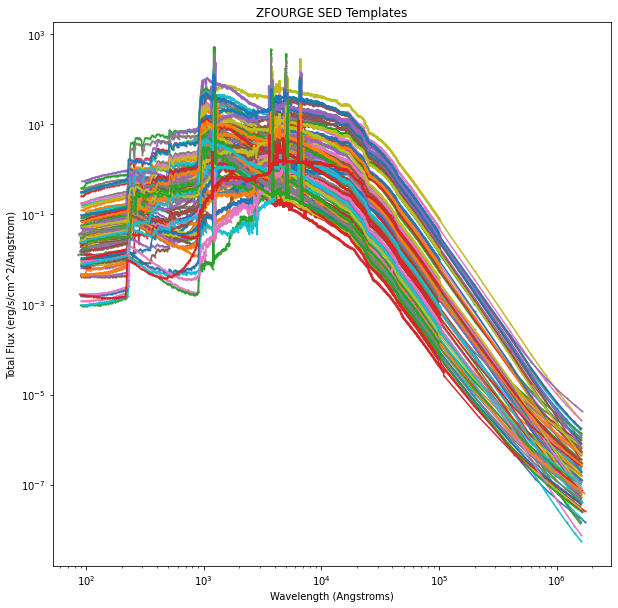

In [509]:
# Plot all of the SEDS

# for each sed, cut it so the wavelength is between 10^2 and 10^5
# then plot it
#for i in range(len(df_list)):
   # df_list[i] = df_list[i][(df_list[i]['lambda (Angstroms)'] > 10**2) & (df_list[i]['lambda (Angstroms)'] < 10**5)]


plt.figure(figsize=(10, 10))
for i in range(len(df_list)):
    plt.loglog(df_list[i].iloc[:, 0], df_list[i].iloc[:, 1], label=objname_list[i], marker='o', markersize=1)
#plt.legend()
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('ZFOURGE SED Templates')
plt.show()




We can see a very very clear trend of the seds now being alligned in their rest frame. The lyman break is clearly visible and the absorption and emission lines are also very clear. This is a very good sign that the SEDs are being generated correctly.

In [510]:
# We now have some SED's that can be put through my fitting code to see how the UVJ diagram looks,
# and to see if it behaves as expected

# We will need to convert the SEDs to a format that can be used by the fitting code
# We can attempt to use the composite code, without the need for the SED fitting code
uv_colours = []
vj_colours = []

# for better coverage, create an AGN SED, combine them at 0% and have a look
agn_df, params = create_type1_skirtor_agn(skirtor_folderpath)


# alpha list
alpha_list = np.linspace(0, 1, 11)

#print(df_list[0])
# create a composite set
composite_df = create_composite_sed(agn_df, df_list[0], 0) # This is just for one, with no agn juice added
print(composite_df)

alpha_list = [0]

# Try now with a composite stack of seds
df_list = generate_composite_set(agn_df, df_list, alpha_list)



      lambda (Angstroms)  Total Flux (erg/s/cm^2/Angstrom)
0           9.965699e+01                      1.544621e-02
1           1.029424e+02                      1.605307e-02
2           1.047129e+02                      1.630330e-02
3           1.051326e+02                      1.636263e-02
4           1.073229e+02                      1.866850e-02
...                  ...                               ...
2902        1.314158e+06                      2.642709e-08
2903        1.445440e+06                      2.217262e-08
2904        1.533184e+06                      1.932906e-08
2905        1.659587e+06                      1.671182e-08
2906        1.752211e+06                      1.479399e-08

[2907 rows x 2 columns]


In [511]:
df_list = df_list[0]

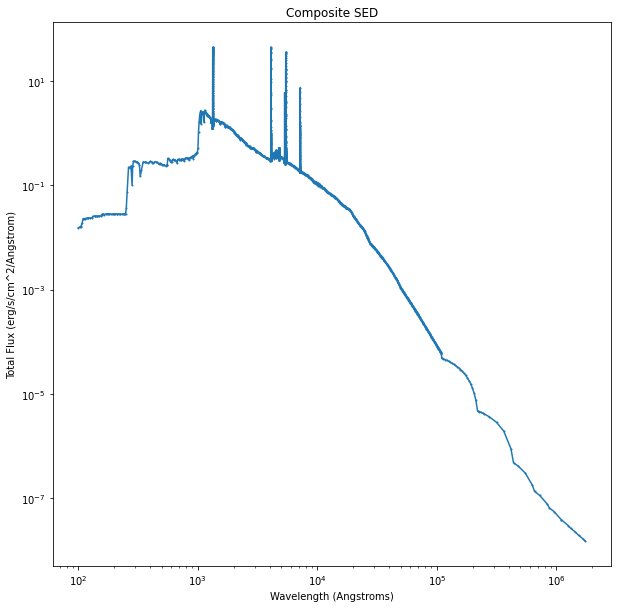

In [512]:
composite_df
# Plot this
plt.figure(figsize=(10, 10))
plt.loglog(composite_df.iloc[:, 0], composite_df.iloc[:, 1], label='Composite', marker='o', markersize=1)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('Composite SED')
plt.show()


In [513]:
uv_colours = []
vj_colours = []
bad_entries = []
new_objname_list = []
print(len(df_list))
for i, sed_data in enumerate(df_list):
    # Create an SED object using astSED    
    wl = sed_data['lambda (Angstroms)']
    fl = sed_data['Total Flux (erg/s/cm^2/Angstrom)']

    # We are using a restframe SED, so z = 0 - now atleast
    sed = astSED.SED(wavelength=wl, flux=fl, z=0.0)    
    
    


    # # Try to calc uvj, if math domain error occurs, if bad SED, delete it
    # uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
    # vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
    # uv_colours.append(uv)
    # vj_colours.append(vj)
    
    # We assume there will be some bad SEDs
    # Try to create UVJ colours, and if it fails, remove the SED
    # we expect a math domain error
    
    try:
        #uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
        #vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
        
        # Try calculate the u mag and the v mag and the j mag seperately as fluxes
        # flux
        u_mag = astSED.SED.calcMag(sed, pb_U, magType='AB')
        v_mag = astSED.SED.calcMag(sed, pb_V, magType='AB')
        j_mag = astSED.SED.calcMag(sed, pb_J, magType='AB')
        
        uv = u_mag - v_mag
        vj = v_mag - j_mag
        
        uv_colours.append(uv)
        vj_colours.append(vj)
        new_objname_list.append(objname_list[i])
    except:
        print('Bad SED')
        print(objname_list[i])
        bad_entries.append(i)
        del df_list[i]
        del objname_list[i]
        
        continue
    



104
Bad SED
11494
Bad SED
14328
Bad SED
21410
Bad SED
26689
Bad SED
26828


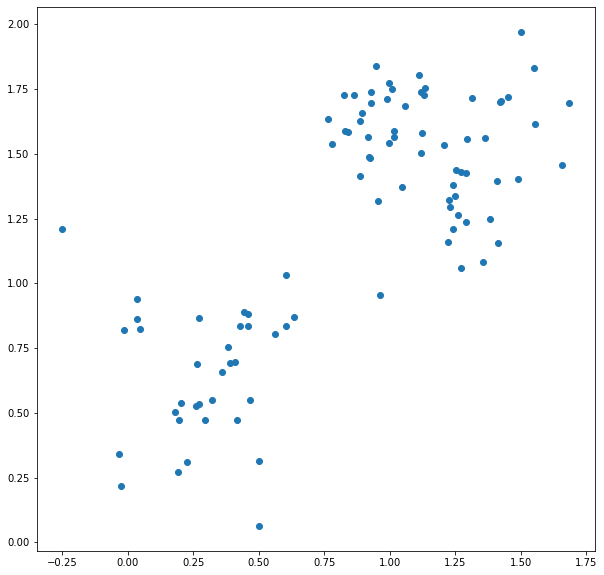

In [514]:
# print the number of bad entries
plt.figure(figsize=(10, 10))
plt.plot(vj_colours, uv_colours, 'o')
plt.show()


In [515]:
# create a dataframe with the IDs, UV and VJ colours
uv_vj_df = pd.DataFrame({'ID': new_objname_list, 'UV': uv_colours, 'VJ': vj_colours})

In [516]:
uv_vj_df

,ID,UV,VJ
0,10327,1.209125,-0.251205
1,10689,0.503645,0.180478
2,10895,0.535976,0.270141
3,11020,0.658625,0.358435
4,11174,0.550244,0.467422
...,...,...,...
89,8214,0.836071,0.459102
90,8587,1.534425,1.207648
91,8693,1.031657,0.603268
92,8827,0.939149,0.035373


               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0


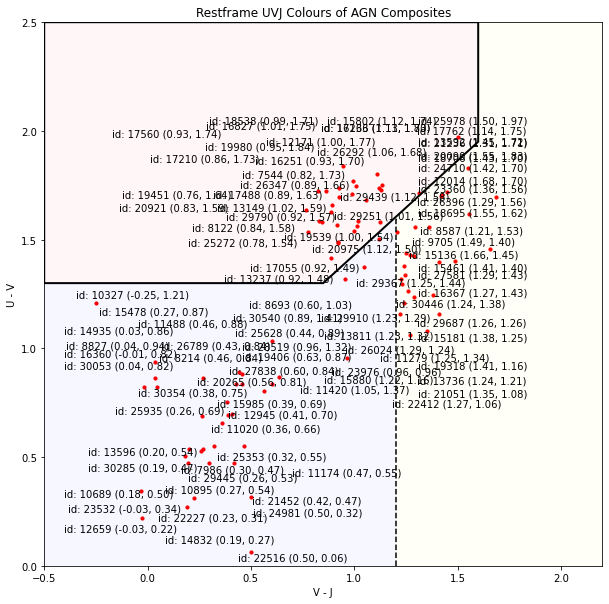

In [517]:
# Now we can plot these in UVJ space, including their relevant labels, and UV/VJ positions
from adjustText import adjust_text

plt.figure(figsize=(10, 10))

plt.scatter(vj_colours, uv_colours, c='r', s=10)

annotations = []

# Annotate points with text and adjust for collisions
texts = []
for i, txt in enumerate(new_objname_list):
    txt = f"id: {txt} ({vj_colours[i]:.2f}, {uv_colours[i]:.2f})"
    texts.append(plt.text(vj_colours[i], uv_colours[i], txt, ha='center'))

# Adjust text to avoid collisions
adjust_text(texts)

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


plt.show()



               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0


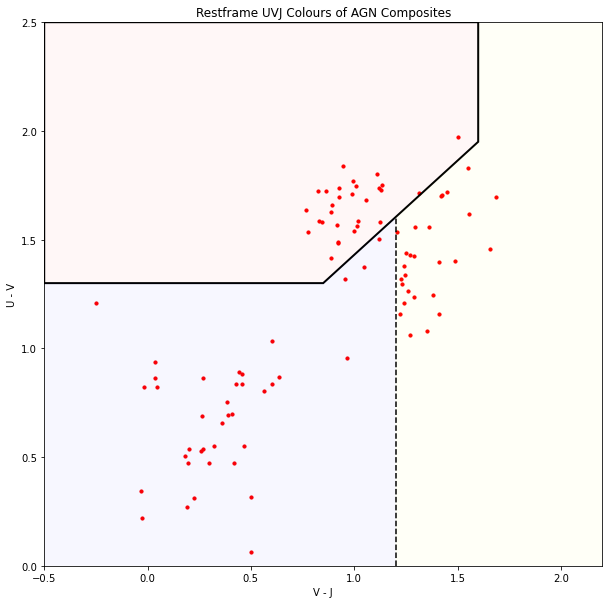

In [518]:
# Now we can plot these in UVJ space, including their relevant labels, and UV/VJ positions

plt.figure(figsize=(10, 10))

plt.scatter(vj_colours, uv_colours, c='r', s=10)

# Adjust text to avoid collisions
adjust_text(texts)

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


plt.show()

In [519]:
import matplotlib.path as mpath


In [520]:

df = uv_vj_df
df


,ID,UV,VJ
0,10327,1.209125,-0.251205
1,10689,0.503645,0.180478
2,10895,0.535976,0.270141
3,11020,0.658625,0.358435
4,11174,0.550244,0.467422
...,...,...,...
89,8214,0.836071,0.459102
90,8587,1.534425,1.207648
91,8693,1.031657,0.603268
92,8827,0.939149,0.035373


               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0


       ID        UV        VJ
9   12171  1.771475  0.995504
12  13149  1.587001  1.016049
13  13237  1.483473  0.922604
24  15802  1.739190  1.118626
27  16233  1.803502  1.112242
28  16251  1.695516  0.927263
31  16827  1.748506  1.008628
32  17055  1.487868  0.921995
33  17166  1.727579  1.128392
34  17210  1.725562  0.863654
35  17488  1.626895  0.887381
36  17560  1.736789  0.928539
37  17762  1.752171  1.135506
38  18538  1.710920  0.988423
43  19451  1.635272  0.764891
44  19539  1.539992  0.997238
45  19980  1.837202  0.945894
48  20921  1.586201  0.828654
51  21236  1.714487  1.314884
61  25272  1.535607  0.777912
65  25978  1.970008  1.500295
67  26292  1.683783  1.056093
68  26347  1.657809  0.893214
74  29251  1.564760  1.014598
76  29439  1.581190  1.123365
79  29790  1.566149  0.917800
85  30540  1.414306  0.885335
86   7544  1.725268  0.823203
88   8122  1.583196  0.841979
       ID        UV        VJ
9   12171  1.771475  0.995504
12  13149  1.587001  1.016049
13  13237 

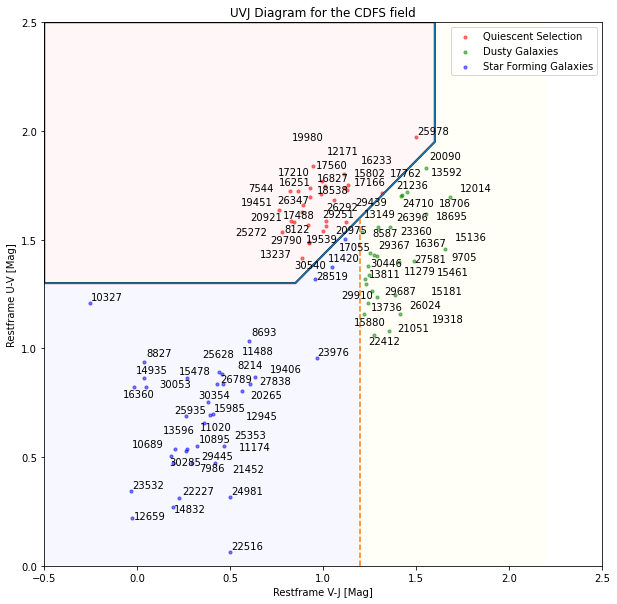

In [521]:

# Plot the UVJ diagram
plt.figure(figsize=(10, 10))

x = df['VJ']
y = df['UV']
id = df['ID']

xmax = 2.5
ymax = 2.5
xmin = -0.5
ymin = 0

# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]

# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
# We want to make a wedge selection for the Quiescent Selection of Galaxies
points = np.column_stack([x, y])
verts = np.array([quiescent_x, quiescent_y]).T
path = mpath.Path(verts)


# Define the path for point selection
#selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

# Use path.contains_points to get a boolean array
points_inside_selection = path.contains_points(np.column_stack([x, y]))



dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



# Filter the DataFrame using the boolean array
selected_df = df[points_inside_selection] # For quiescent, clean later

# Mark dusty, and star-forming galaxies
df.loc[dusty_condition, 'GalaxyType'] = 2
df.loc[star_forming_condition, 'GalaxyType'] = 1




print(selected_df)
#print(unselected_df)

# Now we can easily select the quiescent galaxies and set the galaxy type to quiescent - 0 or starforming 1.
print(selected_df)
selected_ids = selected_df['ID']
df.loc[df['ID'].isin(selected_ids), 'GalaxyType'] = 0 # This is what makes the selection happen



# Try do the same for the unselected galaxies, noting that the unselected galaxies with x and y > 1.2 are dusty galaxies, and the rest are star-forming galaxies
#unselected_ids = unselected_df['id']




# Sort the quiescent and non-quiescent galaxies
quiescent_points = points[path.contains_points(points)]
# Find the points from here to categorise dusty, and star-forming galaxies
non_quiescent_points = points[~path.contains_points(points)]
dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]


#print(non_quiescent_points[0][0])

#print(y)
# Plot the selected points
#plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=10, alpha=0.5, label='Quiescent Selection')
plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=10, alpha=0.5, label='Dusty Galaxies')
plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=10, alpha=0.5, label='Star Forming Galaxies')

# Plot the names for the selected galaxies, in each reigon
text = []
for i in range(len(df)):
   text.append(plt.text(df.iloc[i]['VJ'], df.iloc[i]['UV'], df.iloc[i]['ID']))
adjust_text(text)



plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))


plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the CDFS field')
plt.legend()
plt.show()


In [522]:
df

,ID,UV,VJ,GalaxyType
0,10327,1.209125,-0.251205,1.0
1,10689,0.503645,0.180478,1.0
2,10895,0.535976,0.270141,1.0
3,11020,0.658625,0.358435,1.0
4,11174,0.550244,0.467422,1.0
...,...,...,...,...
89,8214,0.836071,0.459102,1.0
90,8587,1.534425,1.207648,2.0
91,8693,1.031657,0.603268,1.0
92,8827,0.939149,0.035373,1.0
